In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats.mstats import winsorize

from sklearn.preprocessing import (
    StandardScaler, MinMaxScaler, LabelEncoder, OrdinalEncoder
)
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import matplotlib as mpl
# mpl.rcParams['savefig.dpi'] = 80
mpl.rcParams.update({
    'figure.dpi': 80
})
colors = (0.1, 0.1, 0.1)
boxplot_color = 'azure'
flier_color = '#e5e5e5'
median_color = '#ffffff'
patch_color = 'C0'
plt.rcParams.update({
    'axes.facecolor': colors, 'figure.facecolor': colors,
    'axes.edgecolor': (1, 1, 1), 'figure.edgecolor': colors,
    'axes.labelcolor': (1, 1, 1), 'axes.titlecolor': (1, 1, 1),
    'xtick.color': (1, 1, 1), 'ytick.color': (1, 1, 1),
    'legend.edgecolor': 'white', 'legend.edgecolor': 'white',
    'patch.edgecolor': 'azure', 'patch.facecolor': 'azure',
    'patch.force_edgecolor': True, 'grid.color': 'green',
    'text.color': 'white', 'font.size': 12,
    'boxplot.flierprops.color': 'red',
    'boxplot.flierprops.markerfacecolor': flier_color,
    'boxplot.flierprops.markeredgecolor': flier_color,
    'boxplot.flierprops.linewidth': 1.5,
    'boxplot.boxprops.color': boxplot_color,
    'boxplot.boxprops.linewidth': 1.5,
    'boxplot.whiskerprops.color': boxplot_color,
    'boxplot.whiskerprops.linewidth': 1.5,
    'boxplot.capprops.color': boxplot_color,
    'boxplot.capprops.linewidth': 1.5,
    'boxplot.medianprops.color': median_color,
    'boxplot.medianprops.linewidth': 1.5,
    'boxplot.meanprops.color': 'violet',
    'boxplot.patchartist': True,
    'patch.facecolor': patch_color
})
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 30)
# %matplotlib notebook
%matplotlib inline

In [2]:
plt.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': (1, 1, 1),
          'axes.facecolor': (0.1, 0.1, 0.1),
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
       

In [3]:
df = pd.read_csv('dataset/life_expectancy_data.csv')
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [5]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


## Data Preprocessing

- **Renaming columns**

In [6]:
df.rename(
    columns={
        " BMI ": "BMI", "Life expectancy ": "Life_Expectancy",
        "Adult Mortality": "Adult_Mortality",
        "infant deaths": "Infant_Deaths",
        "percentage expenditure": "Percent_Exp",
        "Hepatitis B": "Hepatitis_B", "Measles ": "Measles",
        "under-five deaths ": "Under_Five_Deaths",
        "Diphtheria ": "Diphtheria", " HIV/AIDS": "HIV/AIDS",
        " thinness  1-19 years": "thinness_1to19_years",
        " thinness 5-9 years": "thinness_5to9_years",
        "Income composition of resources": "Income_Comp_Of_Resources",
        "Total expenditure": "Tot_Exp"
    }, inplace=True
)

In [7]:
df

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percent_Exp,Hepatitis_B,Measles,BMI,Under_Five_Deaths,Polio,Tot_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1to19_years,thinness_5to9_years,Income_Comp_Of_Resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


### Handling NaNs

- **Number of records**

In [8]:
num_records_init = df.shape[0]
num_records_init

2938

- **Amount of NaNs in each column**

In [9]:
nan_count_init = df.isnull().sum().sort_values()[::-1]
nan_count_init

Population                  652
Hepatitis_B                 553
GDP                         448
Tot_Exp                     226
Alcohol                     194
Income_Comp_Of_Resources    167
Schooling                   163
BMI                          34
thinness_1to19_years         34
thinness_5to9_years          34
Diphtheria                   19
Polio                        19
Adult_Mortality              10
Life_Expectancy              10
Under_Five_Deaths             0
HIV/AIDS                      0
Measles                       0
Percent_Exp                   0
Infant_Deaths                 0
Status                        0
Year                          0
Country                       0
dtype: int64

- **Percentage of NaNs in each column**

In [10]:
nan_percent_init = (
    df.isnull().sum() * 100 / df.isnull().count()
).sort_values()[::-1]
nan_percent_init

Population                  22.191967
Hepatitis_B                 18.822328
GDP                         15.248468
Tot_Exp                      7.692308
Alcohol                      6.603131
Income_Comp_Of_Resources     5.684139
Schooling                    5.547992
BMI                          1.157250
thinness_1to19_years         1.157250
thinness_5to9_years          1.157250
Diphtheria                   0.646698
Polio                        0.646698
Adult_Mortality              0.340368
Life_Expectancy              0.340368
Under_Five_Deaths            0.000000
HIV/AIDS                     0.000000
Measles                      0.000000
Percent_Exp                  0.000000
Infant_Deaths                0.000000
Status                       0.000000
Year                         0.000000
Country                      0.000000
dtype: float64

- **Amount of rows that contain at least one NaN**

In [11]:
nan_rows_init = df.loc[df.isnull().any(axis=1)].shape[0]
nan_rows_init

1289

- **Columns that have NaNs**

In [12]:
cols_have_nan = nan_percent_init[nan_percent_init > 0]
cols_have_nan = cols_have_nan.index.tolist()
cols_have_nan

['Population',
 'Hepatitis_B',
 'GDP',
 'Tot_Exp',
 'Alcohol',
 'Income_Comp_Of_Resources',
 'Schooling',
 'BMI',
 'thinness_1to19_years',
 'thinness_5to9_years',
 'Diphtheria',
 'Polio',
 'Adult_Mortality',
 'Life_Expectancy']

- **Countries that don't contain any NaNs**

In [13]:
set(df.Country.unique().tolist()) - set(df.loc[
    df.isnull().any(axis=1)
].value_counts('Country').sort_values().index.tolist())

{'Afghanistan', 'Albania'}

- **Countries that contain NaNs**

In [14]:
countries_have_nan = df.loc[
    df.isnull().any(axis=1)
].value_counts('Country').sort_values().index.tolist()
countries_have_nan

['Lithuania',
 'South Africa',
 'Seychelles',
 'San Marino',
 'Samoa',
 'Saint Kitts and Nevis',
 'Romania',
 'Portugal',
 'Poland',
 'Philippines',
 'Papua New Guinea',
 'Palau',
 'El Salvador',
 'Zimbabwe',
 'Ecuador',
 'Fiji',
 'Belarus',
 'Botswana',
 'Cyprus',
 'Brazil',
 'Costa Rica',
 'Belgium',
 'Austria',
 'Dominica',
 'Bulgaria',
 'Dominican Republic',
 'Armenia',
 'Cook Islands',
 'Colombia',
 'China',
 'Belize',
 'Bhutan',
 'Spain',
 'Solomon Islands',
 'Thailand',
 'Israel',
 'Italy',
 'Jordan',
 'Kazakhstan',
 'Kiribati',
 'Latvia',
 'Indonesia',
 'Lebanon',
 'Malaysia',
 'Maldives',
 'Marshall Islands',
 'Swaziland',
 'Mexico',
 'Monaco',
 'Luxembourg',
 'Honduras',
 'Mauritius',
 'Germany',
 'Greece',
 'Tonga',
 'Tunisia',
 'Turkey',
 'Tuvalu',
 'Ukraine',
 'Uruguay',
 'Mongolia',
 'Niue',
 'Nicaragua',
 'Nauru',
 'Morocco',
 'France',
 'Georgia',
 'Vanuatu',
 'Guyana',
 'Australia',
 'Russian Federation',
 'Mozambique',
 'Panama',
 'Benin',
 'Ghana',
 'Rwanda',
 'Uzbek

In [15]:
dct = {}
for country in countries_have_nan:
    dct[country] = (
        df.loc[df.Country == country].shape[0]
    )
num_records = pd.DataFrame({'country': dct.keys(), 'value': dct.values()})
num_records.value.unique()

array([16,  1], dtype=int64)

<p style="font-weight: bold;">As we can see countries have either 16 records or only 1 record</p>

- **Since our records directly connected with datetime, particularly year, the best way to handle NaNs would be df.interpolate()**
- **Thereafter, if there are any NaNs left we will just df.dropna() them**

In [16]:
for country in countries_have_nan:
    df.loc[df.Country == country, cols_have_nan] = (
        df.loc[df.Country == country, cols_have_nan].interpolate(
            limit_direction='both'
        )
    )

- **Difference between inital and current amount of NaNs (after interpolating)**

In [17]:
nan_count_inter = df.isnull().sum().sort_values()[::-1]
(nan_count_init - nan_count_inter).sort_values()[::-1]

Hepatitis_B                 409
Tot_Exp                     194
Alcohol                     177
GDP                          43
Diphtheria                   19
Polio                        19
Population                    4
thinness_5to9_years           0
Income_Comp_Of_Resources      0
BMI                           0
Country                       0
HIV/AIDS                      0
Life_Expectancy               0
Infant_Deaths                 0
thinness_1to19_years          0
Measles                       0
Percent_Exp                   0
Schooling                     0
Status                        0
Under_Five_Deaths             0
Year                          0
Adult_Mortality               0
dtype: int64

- **Change in percents between initial and current (after interpolation) percentage of NaNs**

In [18]:
nan_percent_inter = (
    df.isnull().sum() * 100 /
    df.isnull().count()
).sort_values()[::-1]
(nan_percent_init - nan_percent_inter).sort_values()[::-1]

Hepatitis_B                 13.921035
Tot_Exp                      6.603131
Alcohol                      6.024506
GDP                          1.463581
Diphtheria                   0.646698
Polio                        0.646698
Population                   0.136147
thinness_5to9_years          0.000000
Income_Comp_Of_Resources     0.000000
BMI                          0.000000
Country                      0.000000
HIV/AIDS                     0.000000
Life_Expectancy              0.000000
Infant_Deaths                0.000000
thinness_1to19_years         0.000000
Measles                      0.000000
Percent_Exp                  0.000000
Schooling                    0.000000
Status                       0.000000
Under_Five_Deaths            0.000000
Year                         0.000000
Adult_Mortality              0.000000
dtype: float64

- **Current amount of NaNs, how many NaNs have been interpolated compared to initial value**

In [19]:
nan_rows_inter = df.loc[df.isnull().any(axis=1)].shape[0]
nan_rows_inter, nan_rows_init - nan_rows_inter

(810, 479)

In [20]:
num_records_dropna = pd.read_csv(
    'dataset/life_expectancy_data.csv'
).dropna().shape[0]
num_records_inter = df.dropna().shape[0]
percent_records_dropna = num_records_dropna / num_records_init * 100
percent_records_inter = num_records_inter / num_records_init * 100
print(
    f'initial amount of records: {num_records_init}\n' +
    f'after df.dropna(): {num_records_dropna}\n' +
    f'df.interpolate() and then df.dropna(): {num_records_inter}\n\n' +
    f'total percentage of records: 100.0%\n' +
    f'lost after df.dropna(): {np.round(100 - percent_records_dropna, 2)}%\n' +
    'lost after df.interpolate() and then df.dropna(): ' +
    f'{np.round(100 - percent_records_inter, 2)}%\n' +
    'difference: +' +
    f'{np.round(percent_records_inter - percent_records_dropna, 2)}%'
)

initial amount of records: 2938
after df.dropna(): 1649
df.interpolate() and then df.dropna(): 2128

total percentage of records: 100.0%
lost after df.dropna(): 43.87%
lost after df.interpolate() and then df.dropna(): 27.57%
difference: +16.3%


In [21]:
df.dropna(inplace=True)
(df.isnull().sum() == 0).all()

True

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2128 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   2128 non-null   object 
 1   Year                      2128 non-null   int64  
 2   Status                    2128 non-null   object 
 3   Life_Expectancy           2128 non-null   float64
 4   Adult_Mortality           2128 non-null   float64
 5   Infant_Deaths             2128 non-null   int64  
 6   Alcohol                   2128 non-null   float64
 7   Percent_Exp               2128 non-null   float64
 8   Hepatitis_B               2128 non-null   float64
 9   Measles                   2128 non-null   int64  
 10  BMI                       2128 non-null   float64
 11  Under_Five_Deaths         2128 non-null   int64  
 12  Polio                     2128 non-null   float64
 13  Tot_Exp                   2128 non-null   float64
 14  Diphther

- **Status column needs to be binary encoded to make it numerical**

In [23]:
df['Status'] = df['Status'].replace({
    'Developing': 0,
    'Developed': 1
})
df

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percent_Exp,Hepatitis_B,Measles,BMI,Under_Five_Deaths,Polio,Tot_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1to19_years,thinness_5to9_years,Income_Comp_Of_Resources,Schooling
0,Afghanistan,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,0,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,0,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,0,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,0,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [24]:
df.Status.value_counts()

0    1824
1     304
Name: Status, dtype: int64

### Handling Outliers using Winsorizing technique

**The idea is that we tweak winsorize function's *limits* parameter manually for each column until we see no outliers in a boxplot**

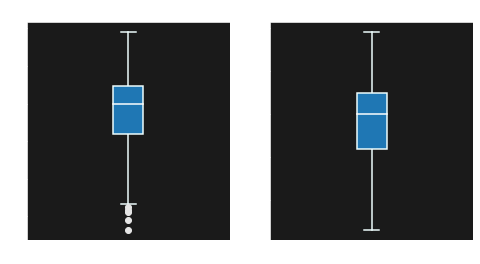

In [25]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.boxplot(df['Life_Expectancy'])
plt.title('Life_Expectancy')

plt.subplot(1, 2, 2)
winsorized_life_expectancy = winsorize(
    df['Life_Expectancy'], limits=(0.0024, 0)
)
plt.boxplot(winsorized_life_expectancy)
plt.title('Winsorized Life_Expectancy')

plt.show()

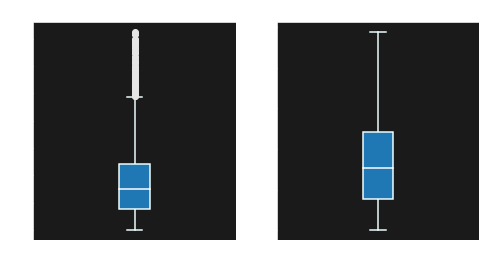

In [26]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.boxplot(df['Adult_Mortality'])
plt.title('Adult_Mortality')

plt.subplot(1, 2, 2)
winsorized_adult_mortality = winsorize(
    df['Adult_Mortality'], limits=(0, 0.0287)
)
plt.boxplot(winsorized_adult_mortality)
plt.title('Winsorized Adult_Mortality')

plt.show()

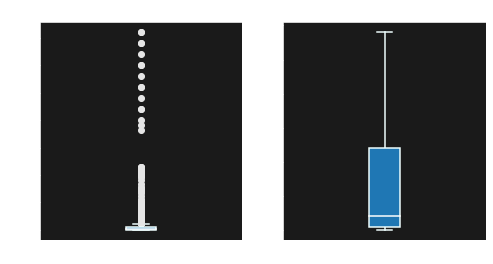

In [27]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.boxplot(df['Infant_Deaths'])
plt.title('Infant_Deaths')

plt.subplot(1, 2, 2)
winsorized_infant_deaths = winsorize(
    df['Infant_Deaths'], limits=(0, 0.1058)
)
plt.boxplot(winsorized_infant_deaths)
plt.title('Winsorized Infant_Deaths')

plt.show()

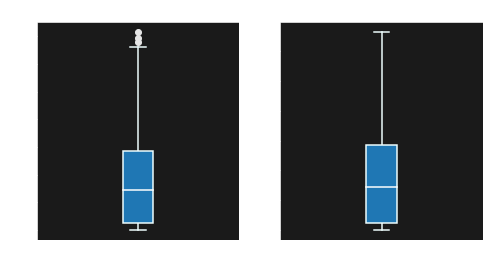

In [28]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.boxplot(df['Alcohol'])
plt.title('Alcohol')

plt.subplot(1, 2, 2)
winsorized_alcohol = winsorize(
    df['Alcohol'], limits=(0, 0.0015)
)
plt.boxplot(winsorized_alcohol)
plt.title('Winsorized Alcohol')

plt.show()

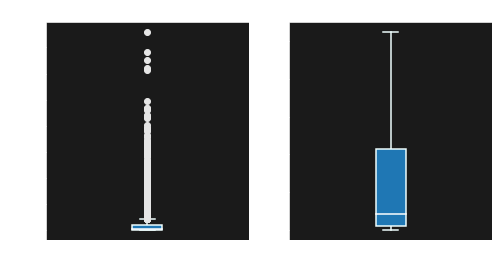

In [29]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.boxplot(df['Percent_Exp'])
plt.title('Percent_Exp')

plt.subplot(1, 2, 2)
winsorized_percent_exp = winsorize(
    df['Percent_Exp'], limits=(0, 0.118)
)
plt.boxplot(winsorized_percent_exp)
plt.title('Winsorized Percent_Exp')

plt.show()

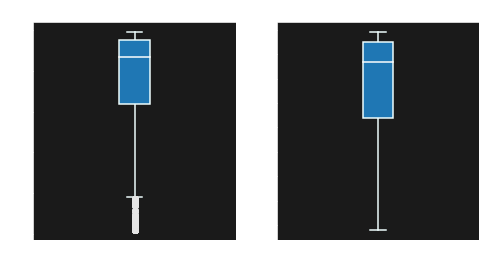

In [30]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.boxplot(df['Hepatitis_B'])
plt.title('Hepatitis_B')

plt.subplot(1, 2, 2)
winsorized_hepatitis_b = winsorize(
    df['Hepatitis_B'], limits=(0.1063, 0)
)
plt.boxplot(winsorized_hepatitis_b)
plt.title('Winsorized Hepatitis_B')

plt.show()

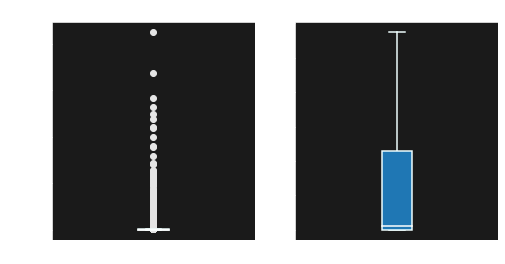

In [31]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.boxplot(df['Measles'])
plt.title('Measles')

plt.subplot(1, 2, 2)
winsorized_measles = winsorize(
    df['Measles'], limits=(0, 0.1847)
)
plt.boxplot(winsorized_measles)
plt.title('Winsorized Measles')

plt.show()

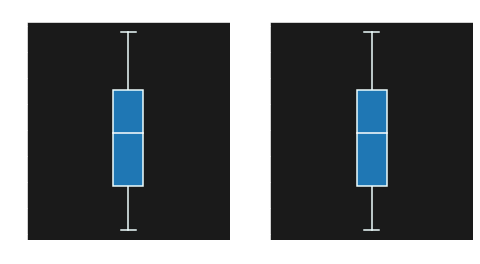

In [32]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.boxplot(df['BMI'])
plt.title('BMI')

plt.subplot(1, 2, 2)
winsorized_bmi = winsorize(
    df['BMI'], limits=(0, 0)
)
plt.boxplot(winsorized_bmi)
plt.title('Winsorized BMI')

plt.show()

<p style="font-weight: bold;">BMI column that doesn't have any outliers</p>

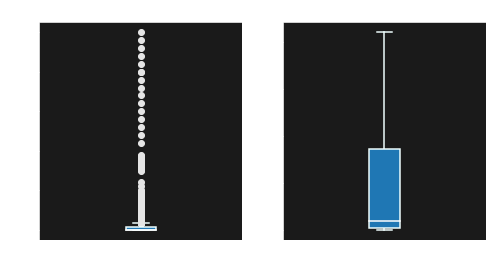

In [33]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.boxplot(df['Under_Five_Deaths'])
plt.title('Under_Five_Deaths')

plt.subplot(1, 2, 2)
winsorized_under_five_deaths = winsorize(
    df['Under_Five_Deaths'], limits=(0, 0.118)
)
plt.boxplot(winsorized_under_five_deaths)
plt.title('Winsorized Under_Five_Deaths')

plt.show()

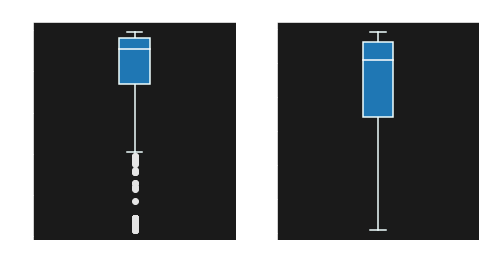

In [34]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.boxplot(df['Polio'])
plt.title('Polio')

plt.subplot(1, 2, 2)
winsorized_polio = winsorize(
    df['Polio'], limits=(0.0809, 0)
)
plt.boxplot(winsorized_polio)
plt.title('Winsorized Polio')

plt.show()

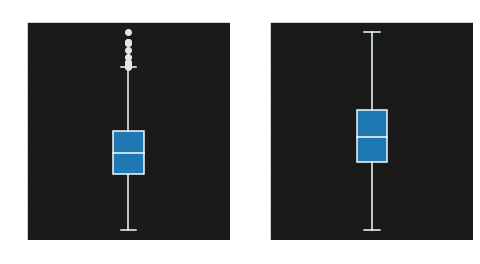

In [35]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.boxplot(df['Tot_Exp'])
plt.title('Tot_Exp')

plt.subplot(1, 2, 2)
winsorized_tot_exp = winsorize(
    df['Tot_Exp'], limits=(0, 0.0062)
)
plt.boxplot(winsorized_tot_exp)
plt.title('Winsorized Tot_Exp')

plt.show()

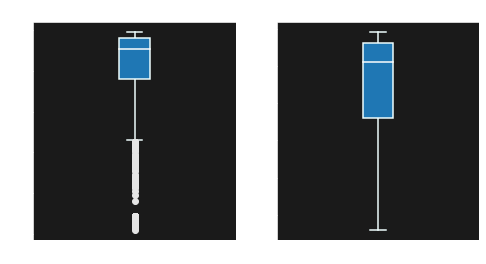

In [36]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.boxplot(df['Diphtheria'])
plt.title('Diphtheria')

plt.subplot(1, 2, 2)
winsorized_diphtheria = winsorize(
    df['Diphtheria'], limits=(0.1044, 0)
)
plt.boxplot(winsorized_diphtheria)
plt.title('Winsorized Diphtheria')

plt.show()

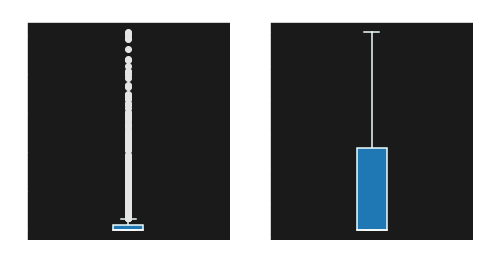

In [37]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.boxplot(df['HIV/AIDS'])
plt.title('HIV/AIDS')

plt.subplot(1, 2, 2)
winsorized_hiv_aids = winsorize(
    df['HIV/AIDS'], limits=(0, 0.1594)
)
plt.boxplot(winsorized_hiv_aids)
plt.title('Winsorized HIV/AIDS')

plt.show()

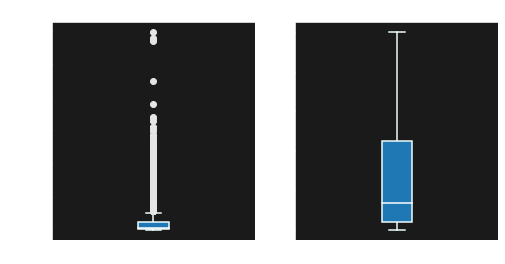

In [38]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.boxplot(df['GDP'])
plt.title('GDP')

plt.subplot(1, 2, 2)
winsorized_gdp = winsorize(
    df['GDP'], limits=(0, 0.1232)
)
plt.boxplot(winsorized_gdp)
plt.title('Winsorized GDP')

plt.show()

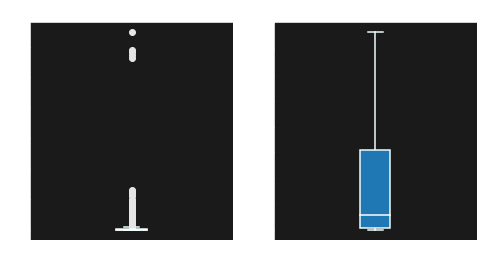

In [39]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.boxplot(df['Population'])
plt.title('Population')

plt.subplot(1, 2, 2)
winsorized_population = winsorize(
    df['Population'], limits=(0, 0.1269)
)
plt.boxplot(winsorized_population)
plt.title('Winsorized Population')

plt.show()

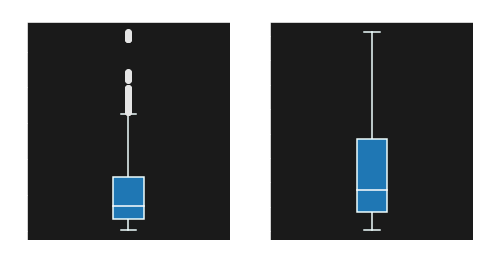

In [40]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.boxplot(df['thinness_1to19_years'])
plt.title('thinness_1to19_years')

plt.subplot(1, 2, 2)
winsorized_thinness_1to19 = winsorize(
    df['thinness_1to19_years'], limits=(0, 0.0353)
)
plt.boxplot(winsorized_thinness_1to19)
plt.title('Winsorized thinness_1to19_years')

plt.show()

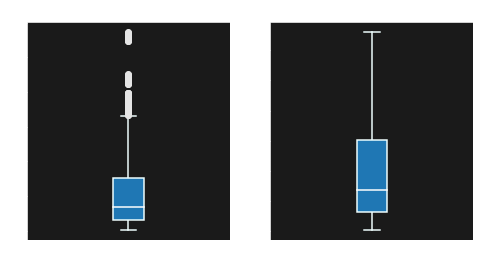

In [41]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.boxplot(df['thinness_5to9_years'])
plt.title('thinness_5to9_years')

plt.subplot(1, 2, 2)
winsorized_thinness_5to9 = winsorize(
    df['thinness_5to9_years'], limits=(0, 0.0376)
)
plt.boxplot(winsorized_thinness_5to9)
plt.title('Winsorized thinness_5to9_years')

plt.show()

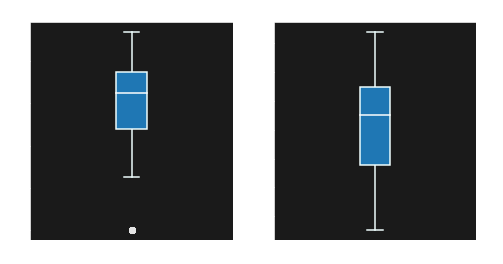

In [42]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.boxplot(df['Income_Comp_Of_Resources'])
plt.title('Income_Comp_Of_Resources')

plt.subplot(1, 2, 2)
winsorized_income_comp = winsorize(
    df['Income_Comp_Of_Resources'], limits=(0.0428, 0)
)
plt.boxplot(winsorized_income_comp)
plt.title('Winsorized Income_Comp_Of_Resources')

plt.show()

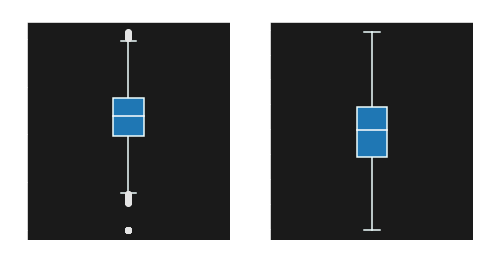

In [43]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.boxplot(df['Schooling'])
plt.title('Schooling')

plt.subplot(1, 2, 2)
winsorized_schooling = winsorize(
    df['Schooling'], limits=(0.0118, 0.0052)
)
plt.boxplot(winsorized_schooling)
plt.title('Winsorized Schooling')

plt.show()

In [44]:
df.columns

Index(['Country', 'Year', 'Status', 'Life_Expectancy', 'Adult_Mortality',
       'Infant_Deaths', 'Alcohol', 'Percent_Exp', 'Hepatitis_B', 'Measles',
       'BMI', 'Under_Five_Deaths', 'Polio', 'Tot_Exp', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness_1to19_years',
       'thinness_5to9_years', 'Income_Comp_Of_Resources', 'Schooling'],
      dtype='object')

In [45]:
winsorized_df = pd.DataFrame({
    'Country': df['Country'].values,
    'Year': df['Year'].values,
    'Status': df['Status'].values,
    'Life_Expectancy': winsorized_life_expectancy,
    'Adult_Mortality': winsorized_adult_mortality,
    'Infant_Deaths': winsorized_infant_deaths,
    'Alcohol': winsorized_alcohol,
    'Percent_Exp': winsorized_percent_exp,
    'Hepatitis_B': winsorized_hepatitis_b,
    'Measles': winsorized_measles,
    'BMI': df['BMI'].values,
    'Under_Five_Deaths': winsorized_under_five_deaths,
    'Polio': winsorized_polio,
    'Tot_Exp': winsorized_tot_exp,
    'Diphtheria': winsorized_diphtheria,
    'HIV/AIDS': winsorized_hiv_aids,
    'GDP': winsorized_gdp,
    'Population': winsorized_population,
    'thinness_1to19_years': winsorized_thinness_1to19,
    'thinness_5to9_years': winsorized_thinness_5to9,
    'Income_Comp_Of_Resources': winsorized_income_comp,
    'Schooling': winsorized_schooling
})
winsorized_df

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percent_Exp,Hepatitis_B,Measles,BMI,Under_Five_Deaths,Polio,Tot_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1to19_years,thinness_5to9_years,Income_Comp_Of_Resources,Schooling
0,Afghanistan,2015,0,65.0,263.0,58,0.01,71.279624,65.0,1147,19.1,83,41.0,8.16,65.0,0.1,584.259210,19148219.0,16.3,16.5,0.479,10.1
1,Afghanistan,2014,0,59.9,271.0,58,0.01,73.523582,62.0,492,18.6,84,58.0,8.18,62.0,0.1,612.696514,327582.0,16.3,16.5,0.476,10.0
2,Afghanistan,2013,0,59.9,268.0,58,0.01,73.219243,64.0,430,18.1,84,62.0,8.13,64.0,0.1,631.744976,19148219.0,16.3,16.5,0.470,9.9
3,Afghanistan,2012,0,59.5,272.0,58,0.01,78.184215,67.0,1147,17.6,84,67.0,8.52,67.0,0.1,669.959000,3696958.0,16.3,16.5,0.463,9.8
4,Afghanistan,2011,0,59.2,275.0,58,0.01,7.097109,68.0,1147,17.2,84,68.0,7.87,68.0,0.1,63.537231,2978599.0,16.3,16.5,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2123,Zimbabwe,2004,0,44.3,487.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,3.0,454.366654,12777511.0,9.4,9.4,0.407,9.2
2124,Zimbabwe,2003,0,44.5,487.0,26,4.06,0.000000,18.0,998,26.7,41,41.0,6.52,68.0,3.0,453.351155,12633897.0,9.8,9.9,0.418,9.5
2125,Zimbabwe,2002,0,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,3.0,57.348340,125525.0,1.2,1.3,0.427,10.0
2126,Zimbabwe,2001,0,45.3,487.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,3.0,548.587312,12366165.0,1.6,1.7,0.427,9.8


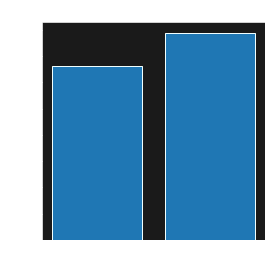

In [46]:
plt.figure(figsize=(4, 4))
plt.bar(
    winsorized_df.groupby('Status')['Status'].count().index,
    winsorized_df.groupby('Status')['Life_Expectancy'].mean()
)
plt.xlabel('Status')
plt.ylabel('Avg Life_Expectancy')
plt.title('Life_Expectancy by Status')
plt.show()

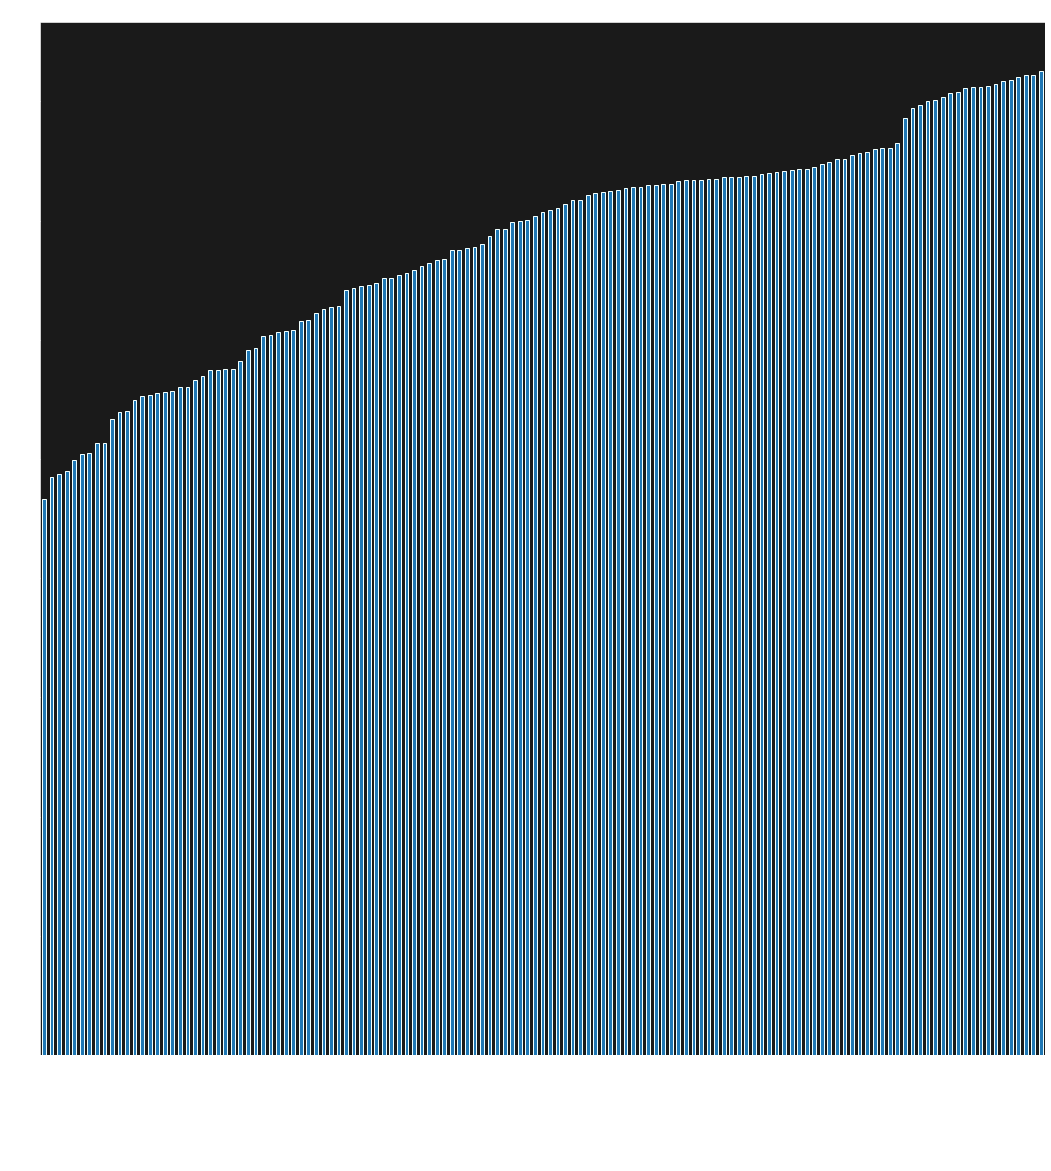

In [47]:
country_by_le = winsorized_df.groupby(
    'Country'
)['Life_Expectancy'].mean().sort_values()
country_by_le.plot(kind='bar', figsize=(18, 19), fontsize=7)
plt.title('Life_Expectancy by Country', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Avg Life_Expectancy', fontsize=12)
plt.show()

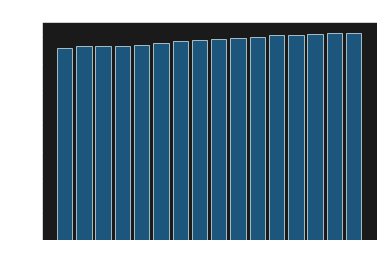

In [48]:
plt.figure(figsize=(6, 4))
plt.bar(
    winsorized_df.groupby('Year')['Year'].count().index,
    winsorized_df.groupby('Year')['Life_Expectancy'].mean(), alpha=0.65
)
plt.xlabel('Year')
plt.ylabel('Avg Life_Expectancy')
plt.title('Life_Expectancy by Year')
plt.show()

In [49]:
winsorized_df.columns[4:21]

Index(['Adult_Mortality', 'Infant_Deaths', 'Alcohol', 'Percent_Exp',
       'Hepatitis_B', 'Measles', 'BMI', 'Under_Five_Deaths', 'Polio',
       'Tot_Exp', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
       'thinness_1to19_years', 'thinness_5to9_years',
       'Income_Comp_Of_Resources'],
      dtype='object')

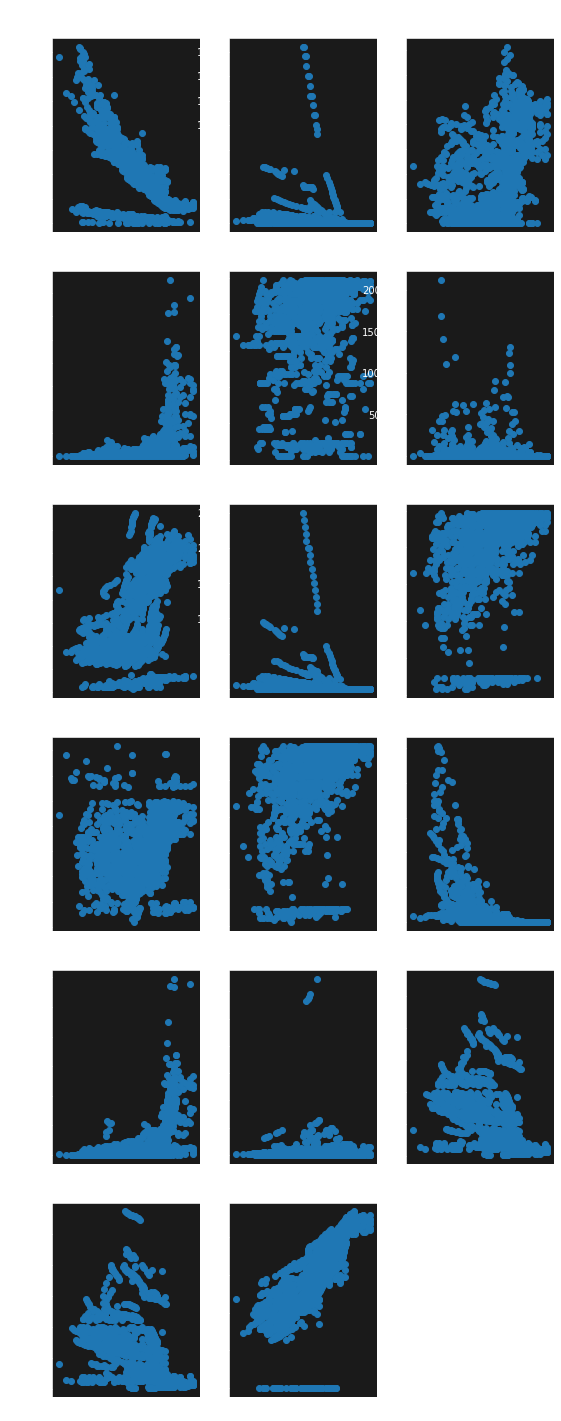

In [50]:
plt.figure(figsize=(9, 25))

for col, i in zip(
    winsorized_df.columns[4:21].tolist(),
    range(1, winsorized_df.columns[4:21].size + 1)
):
    plt.subplot(6, 3, i)
    # todo - log
    plt.scatter(df['Life_Expectancy'], df[col])
    plt.title(f'Life_Expectancy\n{col}')

plt.show()

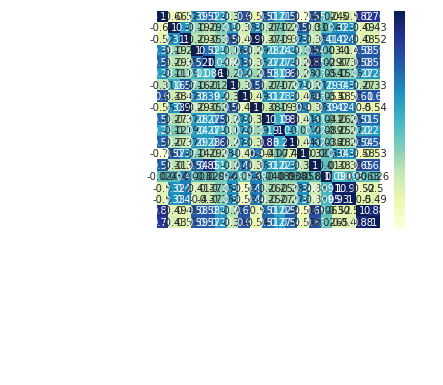

In [51]:
plt.figure(figsize=(5, 4))
sns.heatmap(
    winsorized_df.loc[
        :,
        (winsorized_df.columns != 'Year') &
        (winsorized_df.columns != 'Status')
    ].corr(), annot=True, cmap="YlGnBu"
)
plt.show()

<p style="font-weight: bold;">Heatmap proves what we've discovered from scatter plots:</p>
<ul>
    <li>Life_Expectancy has a strong positive relationship with Income_Comp_Of_Resources and Schooling</li>
    <li>Life_Expectancy has a strong negative relationship with HIV/AIDS</li>
    <li>Life_Expectancy has somewhat negative relationship with Adult_Mortality</li>
    <li>Income_Comp_Of_Resources and Schooling are correlated</li>
    <li>Polio and Diphtheria are correlated</li>
    <li>GDP and Percent_Exp are correlated</li>
    <li>Under_Five_Deaths and Infant_Deaths are correlated</li>
<ul>


In [52]:
ord_enc = OrdinalEncoder(dtype=np.uint8)
winsorized_df['Country'] = ord_enc.fit_transform(
    winsorized_df['Country'].values.reshape(-1, 1)
)
winsorized_df


,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percent_Exp,Hepatitis_B,Measles,BMI,Under_Five_Deaths,Polio,Tot_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1to19_years,thinness_5to9_years,Income_Comp_Of_Resources,Schooling
0,0,2015,0,65.0,263.0,58,0.01,71.279624,65.0,1147,19.1,83,41.0,8.16,65.0,0.1,584.259210,19148219.0,16.3,16.5,0.479,10.1
1,0,2014,0,59.9,271.0,58,0.01,73.523582,62.0,492,18.6,84,58.0,8.18,62.0,0.1,612.696514,327582.0,16.3,16.5,0.476,10.0
2,0,2013,0,59.9,268.0,58,0.01,73.219243,64.0,430,18.1,84,62.0,8.13,64.0,0.1,631.744976,19148219.0,16.3,16.5,0.470,9.9
3,0,2012,0,59.5,272.0,58,0.01,78.184215,67.0,1147,17.6,84,67.0,8.52,67.0,0.1,669.959000,3696958.0,16.3,16.5,0.463,9.8
4,0,2011,0,59.2,275.0,58,0.01,7.097109,68.0,1147,17.2,84,68.0,7.87,68.0,0.1,63.537231,2978599.0,16.3,16.5,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2123,132,2004,0,44.3,487.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,3.0,454.366654,12777511.0,9.4,9.4,0.407,9.2
2124,132,2003,0,44.5,487.0,26,4.06,0.000000,18.0,998,26.7,41,41.0,6.52,68.0,3.0,453.351155,12633897.0,9.8,9.9,0.418,9.5
2125,132,2002,0,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,3.0,57.348340,125525.0,1.2,1.3,0.427,10.0
2126,132,2001,0,45.3,487.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,3.0,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [53]:
country = winsorized_df['Country'].copy()

In [54]:
winsorized_df = pd.get_dummies(winsorized_df, columns=['Country'])
winsorized_df['Country'] = country
winsorized_df

,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percent_Exp,Hepatitis_B,Measles,BMI,Under_Five_Deaths,Polio,Tot_Exp,Diphtheria,HIV/AIDS,...,Country_119,Country_120,Country_121,Country_122,Country_123,Country_124,Country_125,Country_126,Country_127,Country_128,Country_129,Country_130,Country_131,Country_132,Country
0,2015,0,65.0,263.0,58,0.01,71.279624,65.0,1147,19.1,83,41.0,8.16,65.0,0.1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2014,0,59.9,271.0,58,0.01,73.523582,62.0,492,18.6,84,58.0,8.18,62.0,0.1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2013,0,59.9,268.0,58,0.01,73.219243,64.0,430,18.1,84,62.0,8.13,64.0,0.1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2012,0,59.5,272.0,58,0.01,78.184215,67.0,1147,17.6,84,67.0,8.52,67.0,0.1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2011,0,59.2,275.0,58,0.01,7.097109,68.0,1147,17.2,84,68.0,7.87,68.0,0.1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2123,2004,0,44.3,487.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,3.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,132
2124,2003,0,44.5,487.0,26,4.06,0.000000,18.0,998,26.7,41,41.0,6.52,68.0,3.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,132
2125,2002,0,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,3.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,132
2126,2001,0,45.3,487.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,3.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,132


In [55]:
predictors = winsorized_df.loc[
    :,
    (winsorized_df.columns != 'Country') &
    (winsorized_df.columns != 'Life_Expectancy')
].columns.tolist()
predictors

['Year',
 'Status',
 'Adult_Mortality',
 'Infant_Deaths',
 'Alcohol',
 'Percent_Exp',
 'Hepatitis_B',
 'Measles',
 'BMI',
 'Under_Five_Deaths',
 'Polio',
 'Tot_Exp',
 'Diphtheria',
 'HIV/AIDS',
 'GDP',
 'Population',
 'thinness_1to19_years',
 'thinness_5to9_years',
 'Income_Comp_Of_Resources',
 'Schooling',
 'Country_0',
 'Country_1',
 'Country_2',
 'Country_3',
 'Country_4',
 'Country_5',
 'Country_6',
 'Country_7',
 'Country_8',
 'Country_9',
 'Country_10',
 'Country_11',
 'Country_12',
 'Country_13',
 'Country_14',
 'Country_15',
 'Country_16',
 'Country_17',
 'Country_18',
 'Country_19',
 'Country_20',
 'Country_21',
 'Country_22',
 'Country_23',
 'Country_24',
 'Country_25',
 'Country_26',
 'Country_27',
 'Country_28',
 'Country_29',
 'Country_30',
 'Country_31',
 'Country_32',
 'Country_33',
 'Country_34',
 'Country_35',
 'Country_36',
 'Country_37',
 'Country_38',
 'Country_39',
 'Country_40',
 'Country_41',
 'Country_42',
 'Country_43',
 'Country_44',
 'Country_45',
 'Country_4

## Training Model

In [56]:
from sklearn.linear_model import (
    LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
)
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV

### Scaling data

In [57]:
def standardise(df, cols=df.columns):
    return StandardScaler().fit_transform(df[cols])

def normalise(df, cols=df.columns):
    return MinMaxScaler().fit_transform(df[cols])

### Assessing model

In [58]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def print_metrics(y_test, y_pred):
    print(
        f'MAE: {mean_absolute_error(y_test, y_pred)}\n' +
        f'MSE: {mean_squared_error(y_test, y_pred)}\n' +
        f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}\n' +
        f'R2: {r2_score(y_test, y_pred)}\n' +
        f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}'
    )

### Report on feature importances

In [59]:
def feature_importance(predictors, coefs, is_bar=True):
    if is_bar:
        feature_imp = pd.DataFrame({
            "features": predictors, 
            "importance": coefs
        })
        feature_imp.set_index('features', inplace=True)
        feature_imp.sort_values(['importance'], ascending=False, inplace=True)
        feature_imp['importance'].plot(kind='bar', figsize=(15, 8))
        plt.show()
    else:
        importances = list(coefs)
        feature_imp = sorted({
            feature : importance
            for feature, importance in zip(predictors, importances)
        }.items(), key=lambda x: x[1])[::-1]

        for feature in feature_imp:
            print(f'{feature[0]}: {feature[1]}')

In [60]:
scalers = [
    None, standardise, normalise
]
results = []

### Simple LinearRegression

In [61]:
for scaler in scalers:
    for test_size in range(20, 31):
        for split_seed in range(0, 43):
            scaled_df = winsorized_df.copy()
            scaler_name = None
            if scaler is not None:
                scaled_df[predictors] = scaler(scaled_df, cols=predictors)
                scaler_name = scaler.__name__

            X_train, X_test, y_train, y_test = train_test_split(
                scaled_df[predictors], scaled_df['Life_Expectancy'],
                test_size=test_size / 100, random_state=split_seed
            )
            lr = LinearRegression(n_jobs=-1).fit(X_train, y_train)
            y_pred = lr.predict(X_test)

            results.append({
                'model': 'LinearRegression',
                'scaler': scaler_name,
                'test_size': test_size,
                'split_seed': split_seed,
                'r2': r2_score(y_test, y_pred)
            })

In [62]:
results = (sorted(results, key=lambda x: x['r2'], reverse=True)[0],)
results

({'model': 'LinearRegression',
  'scaler': None,
  'test_size': 25,
  'split_seed': 24,
  'r2': 0.9647437591507766},)

<p style="font-weight: bold;">Considering two thinness columns data definetely intersect, since 5to9 age group is inside 1to19, one of them should be dropped. High positive correlation of 0.93 only proves that.</p>

In [63]:
predictors = list(set(predictors) - {'thinness_1to19_years'})

In [64]:
for scaler in scalers:
    scaled_df = winsorized_df.copy()
    scaler_name = None
    if scaler is not None:
        scaled_df[predictors] = scaler(scaled_df, cols=predictors)
        scaler_name = scaler.__name__

    X_train, X_test, y_train, y_test = train_test_split(
        scaled_df[predictors], scaled_df['Life_Expectancy'],
        test_size=0.25, random_state=24
    )
    lr = LinearRegression().fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    
    results += ({
        'model': 'LinearRegression',
        'scaler': scaler_name,
        'test_size': 25,
        'split_seed': 24,
        'r2': r2_score(y_test, y_pred)
    },)

In [65]:
results = (sorted(results, key=lambda x: x['r2'], reverse=True)[0],)
results

({'model': 'LinearRegression',
  'scaler': None,
  'test_size': 25,
  'split_seed': 24,
  'r2': 0.9647449230892491},)

<p style="font-weight: bold;">As you can see, dropping column gave slight improvement, so we update LinearRegression's best result.</p>

### Lasso

In [66]:
for scaler in scalers:
    for test_size in range(20, 31):
        for split_seed in range(0, 43):
            scaled_df = winsorized_df.copy()
            scaler_name = None
            if scaler is not None:
                scaled_df[predictors] = scaler(scaled_df, cols=predictors)
                scaler_name = scaler.__name__

            X_train, X_test, y_train, y_test = train_test_split(
                scaled_df[predictors], scaled_df['Life_Expectancy'],
                test_size=test_size / 100, random_state=split_seed
            )
            lasso = Lasso().fit(X_train, y_train)
            y_pred = lasso.predict(X_test)

            results += ({
                'model': 'Lasso',
                'scaler': scaler_name,
                'test_size': test_size,
                'split_seed': split_seed,
                'r2': r2_score(y_test, y_pred)
            },)

In [67]:
best_lr = (max(
    filter(lambda x: x['model'] == 'LinearRegression', results),
    key=lambda x: x['r2']
),)
best_lr

({'model': 'LinearRegression',
  'scaler': None,
  'test_size': 25,
  'split_seed': 24,
  'r2': 0.9647449230892491},)

In [68]:
best_lasso = (max(
    filter(lambda x: x['model'] == 'Lasso', results),
    key=lambda x: x['r2']
),)
best_lasso

({'model': 'Lasso',
  'scaler': 'standardise',
  'test_size': 26,
  'split_seed': 9,
  'r2': 0.8625718140008233},)

In [69]:
results = best_lr + best_lasso
results

({'model': 'LinearRegression',
  'scaler': None,
  'test_size': 25,
  'split_seed': 24,
  'r2': 0.9647449230892491},
 {'model': 'Lasso',
  'scaler': 'standardise',
  'test_size': 26,
  'split_seed': 9,
  'r2': 0.8625718140008233})

<p style='font-weight: bold;'>Now that we've found best scaling method, test_size and split_seed values I'm going to assess model based on different alpha values using GridSearchCV</p>

In [70]:
%%time
scaled_df = winsorized_df.copy()
scaled_df[predictors] = standardise(scaled_df, cols=predictors)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_df[predictors], scaled_df['Life_Expectancy'],
    test_size=0.26, random_state=9
)

model = Lasso(precompute=True, max_iter=100000)
grid = {
    'alpha': np.arange(0.0001, 0.9999, 0.0001)
}
search = GridSearchCV(model, grid, scoring='r2', n_jobs=-1)
tests = search.fit(X_train, y_train)

Wall time: 3min 9s


In [71]:
tests.best_params_

{'alpha': 0.0001}

In [72]:
model = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
y_pred = model.predict(X_test)

In [73]:
print_metrics(y_test, y_pred)

MAE: 1.3715505871304372
MSE: 4.331771823552716
RMSE: 2.0812909031542697
R2: 0.9538805061488893
MAPE: 2.1445918853103025


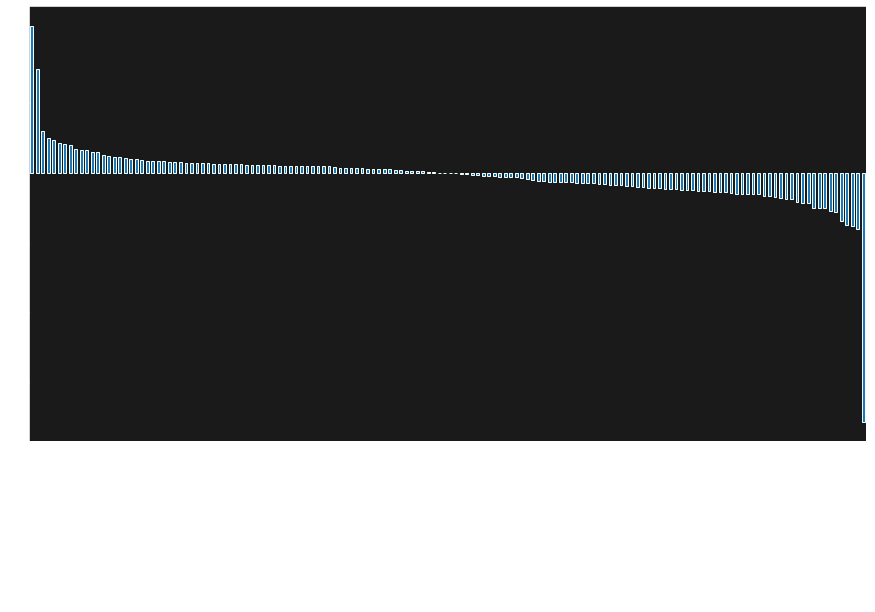

In [74]:
feature_importance(predictors, model.coef_)

In [75]:
feature_importance(predictors, model.coef_, is_bar=False)

Infant_Deaths: 4.213610375827261
Status: 2.976163406730261
Year: 1.2071267891728605
Country_28: 1.0036268617406148
Country_43: 0.9429151018555723
Country_48: 0.8707956186081037
Country_24: 0.8451574923604722
Country_59: 0.8006650206746643
Country_17: 0.6739391503600568
Country_27: 0.6723682768777299
Country_80: 0.6478634628219077
Country_31: 0.6073965896062242
Country_9: 0.6018621580373965
Schooling: 0.5026019586143862
Country_93: 0.4952188617598538
Country_124: 0.4563532340188696
Country_15: 0.44367179732102435
Country_128: 0.41830719868472505
Country_75: 0.4122107573996523
Country_56: 0.4100318219485092
Country_97: 0.3677560863092959
Country_36: 0.34615715685754933
Country_82: 0.330731509708955
Country_55: 0.33068949948050463
Country_4: 0.32985614918942247
Country_1: 0.3254211261548528
Country_61: 0.32248882413404556
Country_2: 0.31184284966287446
Country_40: 0.29466220828041323
Country_67: 0.2936720429191898
Country_96: 0.2868424109017761
Country_92: 0.2786866467850335
Country_118: 

In [76]:
results += ({
    'model': 'Lasso',
    'scaler': standardise.__name__,
    'test_size': 26,
    'split_seed': 9,
    'r2': r2_score(y_test, y_pred),
    'alpha': 0.0001
},)

In [77]:
best_lasso = (max(filter(
    lambda x: x['model'] == 'Lasso', results
), key=lambda x: x['r2']),)
best_lasso

({'model': 'Lasso',
  'scaler': 'standardise',
  'test_size': 26,
  'split_seed': 9,
  'r2': 0.9538805061488893,
  'alpha': 0.0001},)

In [78]:
results = best_lasso + best_lr
sorted(results, key=lambda x: x['r2'], reverse=True)

[{'model': 'LinearRegression',
  'scaler': None,
  'test_size': 25,
  'split_seed': 24,
  'r2': 0.9647449230892491},
 {'model': 'Lasso',
  'scaler': 'standardise',
  'test_size': 26,
  'split_seed': 9,
  'r2': 0.9538805061488893,
  'alpha': 0.0001}]

### LassoCV

In [79]:
%%time
for scaler in scalers:
    for test_size in range(20, 31):
        for split_seed in range(0, 43):
            scaled_df = winsorized_df.copy()
            scaler_name = None
            if scaler is not None:
                scaled_df[predictors] = scaler(scaled_df, cols=predictors)
                scaler_name = scaler.__name__

            X_train, X_test, y_train, y_test = train_test_split(
                scaled_df[predictors], scaled_df['Life_Expectancy'],
                test_size=test_size / 100, random_state=split_seed
            )
            lasso_cv = LassoCV(
                n_jobs=-1, precompute=True, max_iter=100000
            ).fit(X_train, y_train)
            y_pred = lasso_cv.predict(X_test)
            results += ({
                'model': 'LassoCV',
                'scaler': scaler_name,
                'test_size': test_size,
                'split_seed': split_seed,
                'r2': r2_score(y_test, y_pred),
            },)

Wall time: 6min 9s


In [80]:
best_lassocv = (max(
    filter(lambda x: x['model'] == 'LassoCV', results),
    key=lambda x: x['r2']
),)
best_lassocv

({'model': 'LassoCV',
  'scaler': 'standardise',
  'test_size': 25,
  'split_seed': 24,
  'r2': 0.9635560867416948},)

In [81]:
%%time
scaled_df = winsorized_df.copy()
scaled_df[predictors] = standardise(scaled_df, cols=predictors)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_df[predictors], scaled_df['Life_Expectancy'],
    test_size=0.25, random_state=24
)

model = LassoCV(precompute=True, n_jobs=-1, cv=3, max_iter=10**8)
grid = {
    'eps': [1 / (10**x) for x in range(4, 9)],
    'n_alphas': np.arange(100, 1001, 100),
}
search = GridSearchCV(model, grid, scoring='r2', n_jobs=-1)
tests = search.fit(X_train, y_train)

Wall time: 3min 46s


In [82]:
tests.best_params_

{'eps': 1e-05, 'n_alphas': 700}

In [83]:
scaled_df = winsorized_df.copy()
scaled_df[predictors] = standardise(scaled_df, cols=predictors)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_df[predictors], scaled_df['Life_Expectancy'],
    test_size=0.25, random_state=24
)

model = LassoCV(
    precompute=True, n_jobs=-1, n_alphas=700, eps=1e-08, cv=3, max_iter=10**4
).fit(X_train, y_train)
y_pred = model.predict(X_test)

In [84]:
print_metrics(y_test, y_pred)

MAE: 1.2663133866520309
MSE: 3.403047996203362
RMSE: 1.844735210322436
R2: 0.9646463749318981
MAPE: 1.9807753699688635


In [85]:
results += ({
    'model': 'LassoCV',
    'scaler': standardise.__name__,
    'test_size': 25,
    'split_seed': 24,
    'r2': r2_score(y_test, y_pred),
    'eps': 1e-08,
    'n_alphas': 700
},)

In [86]:
best_lassocv = (max(
    filter(lambda x: x['model'] == 'LassoCV', results),
    key=lambda x: x['r2']
),)
best_lassocv

({'model': 'LassoCV',
  'scaler': 'standardise',
  'test_size': 25,
  'split_seed': 24,
  'r2': 0.9646463749318981,
  'eps': 1e-08,
  'n_alphas': 700},)

In [87]:
results = best_lr + best_lasso + best_lassocv
results

({'model': 'LinearRegression',
  'scaler': None,
  'test_size': 25,
  'split_seed': 24,
  'r2': 0.9647449230892491},
 {'model': 'Lasso',
  'scaler': 'standardise',
  'test_size': 26,
  'split_seed': 9,
  'r2': 0.9538805061488893,
  'alpha': 0.0001},
 {'model': 'LassoCV',
  'scaler': 'standardise',
  'test_size': 25,
  'split_seed': 24,
  'r2': 0.9646463749318981,
  'eps': 1e-08,
  'n_alphas': 700})

### Ridge

In [88]:
%%time
for scaler in scalers:
    for test_size in range(20, 31):
        for split_seed in range(0, 43):
            scaled_df = winsorized_df.copy()
            scaler_name = None
            if scaler is not None:
                scaled_df[predictors] = scaler(scaled_df, cols=predictors)
                scaler_name = scaler.__name__

            X_train, X_test, y_train, y_test = train_test_split(
                scaled_df[predictors], scaled_df['Life_Expectancy'],
                test_size=test_size / 100, random_state=split_seed
            )
            ridge = Ridge(solver='svd').fit(X_train, y_train)
            y_pred = ridge.predict(X_test)
            results += ({
                'model': 'Ridge',
                'scaler': scaler_name,
                'test_size': test_size,
                'split_seed': split_seed,
                'r2': r2_score(y_test, y_pred),
            },)

Wall time: 2min 46s


In [89]:
best_ridge = (max(
    filter(lambda x: x['model'] == 'Ridge', results),
    key=lambda x: x['r2']
),)
best_ridge

({'model': 'Ridge',
  'scaler': 'standardise',
  'test_size': 25,
  'split_seed': 24,
  'r2': 0.9647319942435052},)

In [90]:
%%time
scaled_df = winsorized_df.copy()
scaled_df[predictors] = standardise(scaled_df, cols=predictors)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_df[predictors], scaled_df['Life_Expectancy'],
    test_size=0.25, random_state=24
)

model = Ridge(max_iter=10000)
grid = {
    'alpha': [
        1e-10, 1e-9, 1e-8, 1e-7, 1e-6,
        1e-5, 1e-4, 1e-3, 1e-2, 1e-1
    ],
    'solver': [
        'svd', 'cholesky', 'lsqr',
        'sparse_cg', 'sag', 'saga'
    ],
}
search = GridSearchCV(model, grid, scoring='r2', n_jobs=-1)
tests = search.fit(X_train, y_train)

Wall time: 19.2 s


In [91]:
tests.best_params_

{'alpha': 0.1, 'solver': 'sag'}

In [92]:
scaled_df = winsorized_df.copy()
scaled_df[predictors] = standardise(scaled_df, cols=predictors)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_df[predictors], scaled_df['Life_Expectancy'],
    test_size=0.25, random_state=24
)

model = Ridge(
    alpha=0.1, solver='sag'
).fit(X_train, y_train)
y_pred = model.predict(X_test)

In [93]:
print_metrics(y_test, y_pred)

MAE: 1.2663528620198574
MSE: 3.3902073322475204
RMSE: 1.841251566801104
R2: 0.9647797741727042
MAPE: 1.9796716357939899


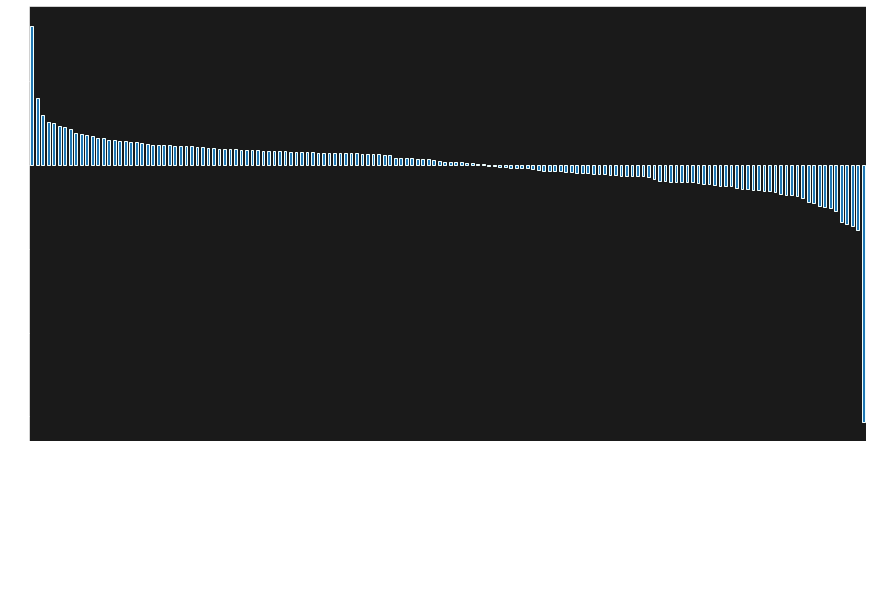

In [94]:
feature_importance(predictors, model.coef_)

In [95]:
feature_importance(predictors, model.coef_, is_bar=False)

Infant_Deaths: 3.3130970261372767
Status: 1.6092497957962477
Year: 1.204736597131603
Country_28: 1.0332629914640332
Country_43: 0.9930506405994242
Country_24: 0.9251457277753261
Country_48: 0.9168414086534088
Country_59: 0.8610241935370109
Country_27: 0.7745546594130589
Country_17: 0.7326569771627299
Country_80: 0.7099608738836927
Country_31: 0.6902589959618085
Country_9: 0.6417103657469748
Country_60: 0.6383450290769584
Country_111: 0.5998984757352634
Country_7: 0.5926856350133796
Country_115: 0.5801374955880294
Country_6: 0.5774225398339973
Country_93: 0.5509686243774776
Country_46: 0.539919459410181
Country_15: 0.5141491892448024
Country_71: 0.4966127635718389
Country_88: 0.4810745952008149
Country_124: 0.47978504803838706
Country_128: 0.47631754073072996
Country_11: 0.4734836423517433
Country_56: 0.4656769449532947
Country_77: 0.449812287592377
Country_99: 0.447725052985939
Country_58: 0.44421724570889
Country_4: 0.4354740224946743
Country_75: 0.4302221869956709
Country_36: 0.41362

In [96]:
results += ({
    'model': 'Ridge',
    'scaler': standardise.__name__,
    'test_size': 25,
    'split_seed': 24,
    'r2': r2_score(y_test, y_pred),
    'alpha': 0.1,
    'solver': 'sag'
},)

In [97]:
best_ridge = (max(
    filter(lambda x: x['model'] == 'Ridge', results),
    key=lambda x: x['r2']
),)
best_ridge

({'model': 'Ridge',
  'scaler': 'standardise',
  'test_size': 25,
  'split_seed': 24,
  'r2': 0.9647797741727042,
  'alpha': 0.1,
  'solver': 'sag'},)

In [98]:
results = best_lr + best_lasso + best_lassocv + best_ridge
results

({'model': 'LinearRegression',
  'scaler': None,
  'test_size': 25,
  'split_seed': 24,
  'r2': 0.9647449230892491},
 {'model': 'Lasso',
  'scaler': 'standardise',
  'test_size': 26,
  'split_seed': 9,
  'r2': 0.9538805061488893,
  'alpha': 0.0001},
 {'model': 'LassoCV',
  'scaler': 'standardise',
  'test_size': 25,
  'split_seed': 24,
  'r2': 0.9646463749318981,
  'eps': 1e-08,
  'n_alphas': 700},
 {'model': 'Ridge',
  'scaler': 'standardise',
  'test_size': 25,
  'split_seed': 24,
  'r2': 0.9647797741727042,
  'alpha': 0.1,
  'solver': 'sag'})

In [99]:
pd.DataFrame(results).to_csv('./dataset/results.csv')

### RidgeCV

In [100]:
%%time
for scaler in scalers:
    for test_size in range(20, 31):
        for split_seed in range(0, 43):
            scaled_df = winsorized_df.copy()
            scaler_name = None
            if scaler is not None:
                scaled_df[predictors] = scaler(scaled_df, cols=predictors)
                scaler_name = scaler.__name__

            X_train, X_test, y_train, y_test = train_test_split(
                scaled_df[predictors], scaled_df['Life_Expectancy'],
                test_size=test_size / 100, random_state=split_seed
            )
            ridgecv = RidgeCV().fit(X_train, y_train)
            y_pred = ridgecv.predict(X_test)
            results += ({
                'model': 'RidgeCV',
                'scaler': scaler_name,
                'test_size': test_size,
                'split_seed': split_seed,
                'r2': r2_score(y_test, y_pred),
            },)

Wall time: 2min 59s


In [101]:
best_ridgecv = (max(
    filter(lambda x: x['model'] == 'RidgeCV', results),
    key=lambda x: x['r2']
),)
best_ridgecv

({'model': 'RidgeCV',
  'scaler': 'standardise',
  'test_size': 25,
  'split_seed': 24,
  'r2': 0.9647319942434992},)

In [102]:
%%time
scaled_df = winsorized_df.copy()
scaled_df[predictors] = standardise(scaled_df, cols=predictors)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_df[predictors], scaled_df['Life_Expectancy'],
    test_size=0.25, random_state=24
)

model = RidgeCV(alphas=np.arange(1e-3, 1, 5 * 1e-3))
grid = {
    'cv': np.arange(3, 9, 1),
    'gcv_mode': ['auto', 'svd', 'eigen'],
}
search = GridSearchCV(model, grid, scoring='r2', n_jobs=-1)
tests = search.fit(X_train, y_train)

Wall time: 5min 32s


In [103]:
tests.best_params_

{'cv': 8, 'gcv_mode': 'auto'}

In [104]:
scaled_df = winsorized_df.copy()
scaled_df[predictors] = standardise(scaled_df, cols=predictors)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_df[predictors], scaled_df['Life_Expectancy'],
    test_size=0.25, random_state=24
)

model = RidgeCV(alphas=[0.34]).fit(X_train, y_train)
y_pred = model.predict(X_test)

In [105]:
print_metrics(y_test, y_pred)

MAE: 1.2661561003490378
MSE: 3.3910078193201314
RMSE: 1.841468929773221
R2: 0.9647714580631845
MAPE: 1.9795555794702557


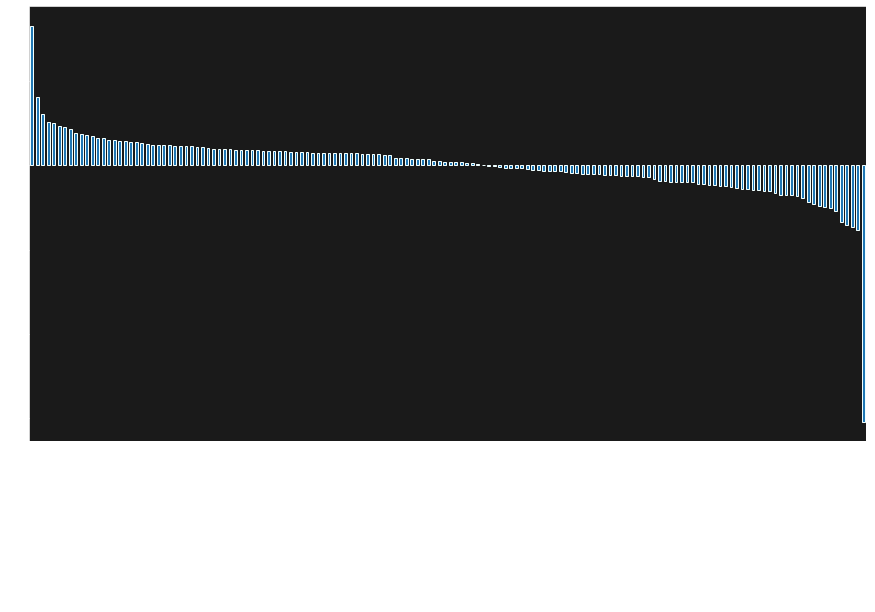

In [106]:
feature_importance(predictors, model.coef_)

In [107]:
feature_importance(predictors, model.coef_, is_bar=False)

Infant_Deaths: 3.2955825587103647
Status: 1.6067428571575988
Year: 1.2018015337002197
Country_28: 1.0278801190241538
Country_43: 0.9913188471168723
Country_24: 0.9238085637224458
Country_48: 0.9155534062121404
Country_59: 0.8598859627665831
Country_27: 0.7736613532383387
Country_17: 0.7278233152396609
Country_80: 0.707124556555712
Country_31: 0.6901672782886124
Country_9: 0.6377300177502434
Country_60: 0.6375638409277258
Country_111: 0.5990384699768612
Country_7: 0.5920934871962906
Country_115: 0.5795303735609707
Country_6: 0.5758912511300798
Country_93: 0.5507055829108012
Country_46: 0.5388867479546064
Country_15: 0.5147367286121636
Country_71: 0.49629575014424177
Country_88: 0.4803361170019542
Country_124: 0.47817607626349456
Country_128: 0.4756490665697939
Country_11: 0.47266198596756226
Country_56: 0.4607621266050046
Country_77: 0.44969401898313777
Country_99: 0.44714841801761906
Country_58: 0.44308002458189577
Country_4: 0.43379301930021796
Country_75: 0.4312375063974798
Country_3

In [108]:
results += ({
    'model': 'RidgeCV',
    'scaler': standardise.__name__,
    'test_size': 25,
    'split_seed': 24,
    'r2': r2_score(y_test, y_pred),
    'alphas': 'np.arange(1e-3, 1, 5 * 1e-3)'
},)

In [109]:
best_ridgecv = (max(
    filter(lambda x: x['model'] == 'RidgeCV', results),
    key=lambda x: x['r2']
),)
best_ridgecv

({'model': 'RidgeCV',
  'scaler': 'standardise',
  'test_size': 25,
  'split_seed': 24,
  'r2': 0.9647714580631845,
  'alphas': 'np.arange(1e-3, 1, 5 * 1e-3)'},)

In [110]:
results = (
    best_lr + best_lasso + best_lassocv +
    best_ridge + best_ridgecv
)
results

({'model': 'LinearRegression',
  'scaler': None,
  'test_size': 25,
  'split_seed': 24,
  'r2': 0.9647449230892491},
 {'model': 'Lasso',
  'scaler': 'standardise',
  'test_size': 26,
  'split_seed': 9,
  'r2': 0.9538805061488893,
  'alpha': 0.0001},
 {'model': 'LassoCV',
  'scaler': 'standardise',
  'test_size': 25,
  'split_seed': 24,
  'r2': 0.9646463749318981,
  'eps': 1e-08,
  'n_alphas': 700},
 {'model': 'Ridge',
  'scaler': 'standardise',
  'test_size': 25,
  'split_seed': 24,
  'r2': 0.9647797741727042,
  'alpha': 0.1,
  'solver': 'sag'},
 {'model': 'RidgeCV',
  'scaler': 'standardise',
  'test_size': 25,
  'split_seed': 24,
  'r2': 0.9647714580631845,
  'alphas': 'np.arange(1e-3, 1, 5 * 1e-3)'})

### ElasticNetCV

In [111]:
%%time
for scaler in scalers:
    for test_size in range(20, 31):
        for split_seed in range(0, 43):
            scaled_df = winsorized_df.copy()
            scaler_name = None
            if scaler is not None:
                scaled_df[predictors] = scaler(scaled_df, cols=predictors)
                scaler_name = scaler.__name__

            X_train, X_test, y_train, y_test = train_test_split(
                scaled_df[predictors], scaled_df['Life_Expectancy'],
                test_size=test_size / 100, random_state=split_seed
            )
            elasticnet = ElasticNetCV(
                precompute=True, n_jobs=-1
            ).fit(X_train, y_train)
            y_pred = elasticnet.predict(X_test)
            results += ({
                'model': 'ElasticNetCV',
                'scaler': scaler_name,
                'test_size': test_size,
                'split_seed': split_seed,
                'r2': r2_score(y_test, y_pred),
            },)

Wall time: 5min 21s


In [112]:
best_elasticnetcv = (max(
    filter(lambda x: x['model'] == 'ElasticNetCV', results),
    key=lambda x: x['r2']
),)
best_elasticnetcv

({'model': 'ElasticNetCV',
  'scaler': 'standardise',
  'test_size': 25,
  'split_seed': 24,
  'r2': 0.9622324348667551},)

In [133]:
%%time
scaled_df = winsorized_df.copy()
scaled_df[predictors] = standardise(scaled_df, cols=predictors)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_df[predictors], scaled_df['Life_Expectancy'],
    test_size=0.25, random_state=24
)

model = ElasticNetCV(precompute=True, n_jobs=-1, max_iter=10000)
grid = {
    'l1_ratio': np.arange(1e-2, 1, 1e-1),
    'eps': [1e-4, 1e-5, 1e-6, 1e-7],
    'n_alphas': [100, 200, 300],
    'selection': ['cyclic', 'random']
}
search = GridSearchCV(model, grid, scoring='r2', n_jobs=-1)
tests = search.fit(X_train, y_train)

Wall time: 36min 42s
Compiler : 127 ms


In [134]:
tests.best_params_

{'eps': 1e-06, 'l1_ratio': 0.91, 'n_alphas': 100, 'selection': 'random'}

In [152]:
scaled_df = winsorized_df.copy()
scaled_df[predictors] = standardise(scaled_df, cols=predictors)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_df[predictors], scaled_df['Life_Expectancy'],
    test_size=0.25, random_state=24
)

model = ElasticNetCV(
    eps=1e-9, l1_ratio=0.0001, selection='cyclic',
    precompute=True, max_iter=10000000, n_jobs=-1,
    n_alphas=400, tol=0.000001
).fit(X_train, y_train)
y_pred = model.predict(X_test)

In [153]:
"""
eps=1e-9, l1_ratio=0.0001, selection='cyclic',
precompute=True, max_iter=1000000, n_jobs=-1,
n_alphas=400, tol=0.000001
"""
print_metrics(y_test, y_pred)

MAE: 1.2622213669580968
MSE: 3.3962831553249395
RMSE: 1.8429007448381314
R2: 0.9647166535904207
MAPE: 1.9737771419745742


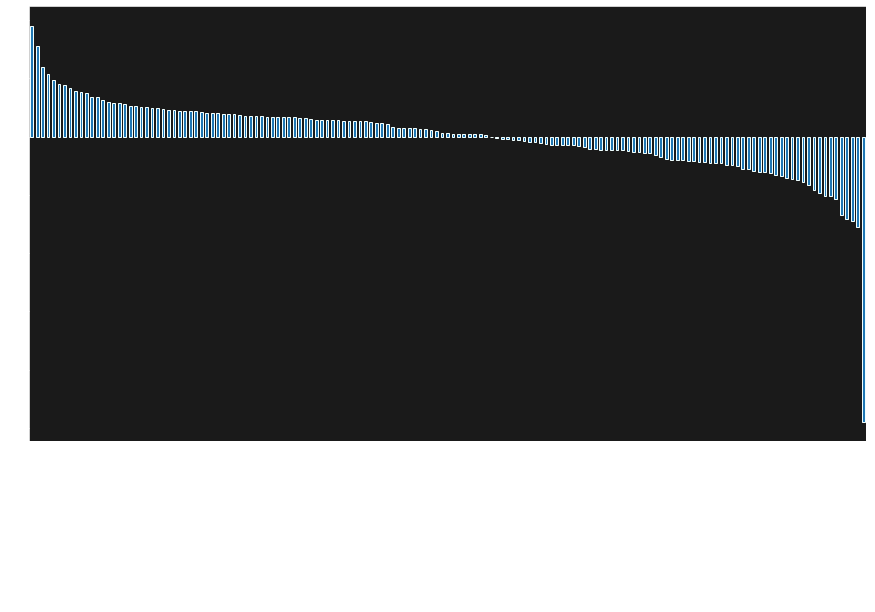

In [154]:
feature_importance(predictors, model.coef_)

In [155]:
feature_importance(predictors, model.coef_, is_bar=False)

Infant_Deaths: 1.893077904007371
Status: 1.5560247391503068
Year: 1.184956381614006
Country_28: 1.064640603395776
Country_43: 0.9722023614232256
Country_24: 0.9037480378199408
Country_48: 0.8901806408298075
Country_59: 0.8367577323561934
Country_17: 0.7888687476671429
Country_80: 0.7626569609069852
Country_27: 0.7547314166362137
Country_9: 0.6780138671744979
Country_31: 0.6699937349057412
Country_60: 0.6290276591510426
Country_111: 0.589731742240789
Country_7: 0.5795148681379743
Country_115: 0.5668879727860263
Country_6: 0.5623298903618842
Country_46: 0.5297903615556389
Country_93: 0.5285587705223374
Country_124: 0.5059253382761253
Country_56: 0.5003175706773242
Country_15: 0.49463252511086847
Country_71: 0.48388171858748935
Country_88: 0.4704057288965731
Country_11: 0.4582911102763891
Country_128: 0.4531405984222282
Country_97: 0.4464630773592113
Country_77: 0.43789752727838055
Country_99: 0.4344250491998171
Country_4: 0.43186254971548926
Country_58: 0.4291113130745588
Country_75: 0.4

In [156]:
results += ({
    'model': 'ElasticNetCV',
    'scaler': standardise.__name__,
    'test_size': 25,
    'split_seed': 24,
    'r2': r2_score(y_test, y_pred),
    'eps': 1e-9,
    'l1_ratio': 0.0001,
    'selection': 'cyclic',
    'max_iter': 1000000,
    'n_alphas': 400,
    'tol': 0.000001
},)

In [157]:
best_elasticnet = (max(
    filter(lambda x: x['model'] == 'ElasticNetCV', results),
    key=lambda x: x['r2']
),)
best_elasticnet

({'model': 'ElasticNetCV',
  'scaler': 'standardise',
  'test_size': 25,
  'split_seed': 24,
  'r2': 0.9647166535904207,
  'eps': 1e-09,
  'l1_ratio': 0.0001,
  'selection': 'cyclic',
  'max_iter': 1000000,
  'n_alphas': 400,
  'tol': 1e-06},)